<a href="https://colab.research.google.com/github/Tanu-N-Prabhu/Python/blob/master/Machine%20Learning%20Interview%20Prep%20Questions/Unsupervised%20Learning%20Algorithms/Anomaly%20Detection/Local%20Outlier%20Factor/lof_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## What Is LOF?
Local Outlier Factor (LOF) is an unsupervised anomaly detection algorithm that compares the local density of a point to the density of its neighbors. Anomalies are points that have much lower density than their surroundings.

## Key Concepts

| Term                                 | Meaning                                                      |
| ------------------------------------ | ------------------------------------------------------------ |
| **k-distance**                       | Distance to the k-th nearest neighbor                        |
| **Reachability distance**            | Max(k-distance of neighbor, actual distance)                 |
| **Local Reachability Density (LRD)** | Inverse of average reachability distance                     |
| **LOF score**                        | Ratio of average LRD of neighbors to LRD of the point itself |


## Interpretation
* LOF `≈` 1 → normal point
* LOF `>` 1 → potential outlier
* LOF `≫` 1 → strong outlier

## Implementation (Step-by-Step, Function-Based)

In [1]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

## 1. Generate Data


In [2]:
# Normal data cluster + a few outliers
X, _ = make_blobs(n_samples=100, centers=1, cluster_std=0.7, random_state=42)
outliers = np.random.uniform(low=-6, high=6, size=(5, 2))
data = np.vstack((X, outliers))

## 2. Euclidean Distance Function

In [3]:
def euclidean(a, b):
    return np.linalg.norm(a - b)

## 3. Get k Nearest Neighbors for Each Point

In [4]:
def k_nearest_neighbors(data, point_index, k):
    distances = []
    for i, point in enumerate(data):
        if i != point_index:
            d = euclidean(data[point_index], point)
            distances.append((i, d))
    distances.sort(key=lambda x: x[1])
    return distances[:k]

## 4. Compute k-Distance and Reachability Distances

In [5]:
def compute_reachability_distances(data, k):
    k_distances = []
    reach_dists = []

    for i in range(len(data)):
        neighbors = k_nearest_neighbors(data, i, k)
        k_dist_i = neighbors[-1][1]
        k_distances.append(k_dist_i)

        reach_i = []
        for j, d in neighbors:
            k_dist_j = k_nearest_neighbors(data, j, k)[-1][1]
            reach_dist = max(k_dist_j, d)
            reach_i.append(reach_dist)
        reach_dists.append(reach_i)

    return k_distances, reach_dists

## 5. Compute Local Reachability Density (LRD)

In [6]:
def compute_lrd(reach_dists):
    lrd = []
    for reach_list in reach_dists:
        if sum(reach_list) == 0:
            lrd.append(0)
        else:
            lrd.append(len(reach_list) / sum(reach_list))
    return lrd

## 6. Compute LOF Scores

In [7]:
def compute_lof_scores(data, k):
    _, reach_dists = compute_reachability_distances(data, k)
    lrd = compute_lrd(reach_dists)
    lof_scores = []

    for i in range(len(data)):
        neighbors = k_nearest_neighbors(data, i, k)
        lrd_ratios = [lrd[j] / lrd[i] if lrd[i] != 0 else 0 for j, _ in neighbors]
        lof = sum(lrd_ratios) / k
        lof_scores.append(lof)

    return lof_scores

## 7. Detect Outliers

In [8]:
k = 5
lof_scores = compute_lof_scores(data, k)

for i, score in enumerate(lof_scores):
    status = "Anomaly 🚨" if score > 1.5 else "Normal ✅"
    print(f"Point {i}: LOF = {score:.3f} | {status}")

Point 0: LOF = 0.975 | Normal ✅
Point 1: LOF = 1.106 | Normal ✅
Point 2: LOF = 0.975 | Normal ✅
Point 3: LOF = 0.998 | Normal ✅
Point 4: LOF = 0.962 | Normal ✅
Point 5: LOF = 1.012 | Normal ✅
Point 6: LOF = 1.187 | Normal ✅
Point 7: LOF = 0.980 | Normal ✅
Point 8: LOF = 1.096 | Normal ✅
Point 9: LOF = 1.166 | Normal ✅
Point 10: LOF = 1.193 | Normal ✅
Point 11: LOF = 1.062 | Normal ✅
Point 12: LOF = 1.136 | Normal ✅
Point 13: LOF = 1.150 | Normal ✅
Point 14: LOF = 1.053 | Normal ✅
Point 15: LOF = 1.128 | Normal ✅
Point 16: LOF = 1.023 | Normal ✅
Point 17: LOF = 0.980 | Normal ✅
Point 18: LOF = 1.023 | Normal ✅
Point 19: LOF = 1.017 | Normal ✅
Point 20: LOF = 1.042 | Normal ✅
Point 21: LOF = 1.344 | Normal ✅
Point 22: LOF = 1.021 | Normal ✅
Point 23: LOF = 0.944 | Normal ✅
Point 24: LOF = 1.047 | Normal ✅
Point 25: LOF = 1.171 | Normal ✅
Point 26: LOF = 1.150 | Normal ✅
Point 27: LOF = 0.962 | Normal ✅
Point 28: LOF = 0.952 | Normal ✅
Point 29: LOF = 1.157 | Normal ✅
Point 30: LOF = 0.96

## 8. Visualize


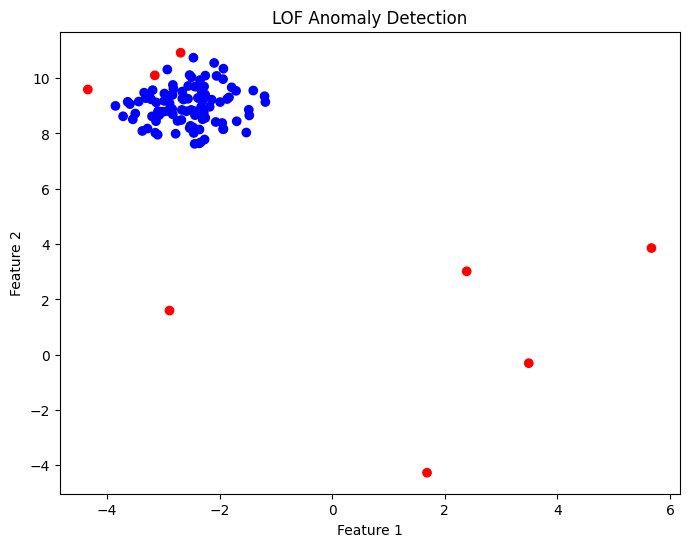

In [9]:
colors = ['red' if score > 1.5 else 'blue' for score in lof_scores]

plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c=colors)
plt.title("LOF Anomaly Detection")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

## Summary

| Step | Description                    |
|:---- |:------------------------------ |
| 1    | Generate data                  |
| 2    | Measure distances              |
| 3    | Get k-nearest neighbors        |
| 4    | Compute reachability distances |
| 5    | Compute LRD (local density)    |
| 6    | Compute LOF score              |
| 7    | Predict anomalies              |
| 8    | Visualize results              |


